In [24]:
import pandas as pd
import numpy as np

# The purpose of our analysis and building models is to predict passenger satisfaction with the airline

### Information about columns we get from Kaggle

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [25]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv('test.csv')
df = pd.concat([df_train, df_test])
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [26]:
df.shape

(129880, 25)

In [27]:
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    12988

In [29]:
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [30]:
df['Arrival Delay in Minutes'].fillna(value=df['Arrival Delay in Minutes'].median(axis=0),inplace=True)

In [31]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [32]:
target_map = {'neutral or dissatisfied': 0, 'satisfied': 1}
df['satisfaction'] = df['satisfaction'].map(target_map)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [33]:
object_cols_df = [col for col in df.columns if df[col].dtype == 'object' ]
object_cols_df

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [34]:
cat_uniques = [df[col].unique() for col in object_cols_df]

cat_unique_mappings = []
for cols, name in zip(cat_uniques, object_cols_df):
    mapping = {}
    for index, value in enumerate(cols):
        mapping[value] = index
    cat_unique_mappings.append(mapping)
cat_unique_mappings

[{'Male': 0, 'Female': 1},
 {'Loyal Customer': 0, 'disloyal Customer': 1},
 {'Personal Travel': 0, 'Business travel': 1},
 {'Eco Plus': 0, 'Business': 1, 'Eco': 2}]

In [35]:
for col, mapping in zip(object_cols_df, cat_unique_mappings):
    df[col] = df[col].map(mapping)
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,13,0,0,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,1,25,1,1,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,0,26,1,1,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,0,25,1,1,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,0,61,1,1,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0,1,34,1,1,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,0
25972,0,0,23,1,1,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
25973,1,0,17,0,2,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0
25974,0,0,14,1,1,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


In [36]:
df.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,0.507384,0.183092,39.427957,0.690584,1.376486,1190.316392,2.728696,3.057599,2.756876,2.976925,...,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.045465,0.434463
std,0.499947,0.386743,15.119360,0.462255,0.616170,997.452477,1.329340,1.526741,1.401740,1.278520,...,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.416353,0.495688
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,1.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,40.000000,1.000000,1.000000,844.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,2.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  int64  
 1   Customer Type                      129880 non-null  int64  
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  int64  
 4   Class                              129880 non-null  int64  
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    12988

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

Satisfaction: 'neutral or dissatisfied': 0, 'satisfied': 1

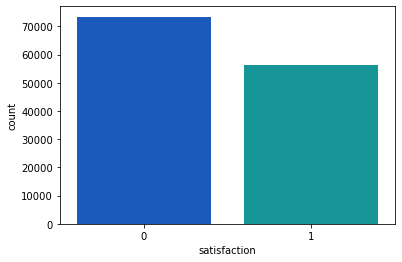

In [51]:
sns.countplot(data=df, x='satisfaction', palette='winter')

In [53]:
df.satisfaction.value_counts()/ df.shape[0]*100

0    56.553742
1    43.446258
Name: satisfaction, dtype: float64

Gender: 'Male': 0, 'Female': 1

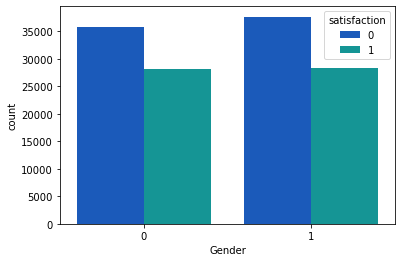

In [39]:
sns.countplot(data=df, x='Gender', hue='satisfaction', palette='winter')

In [77]:
df.Gender.value_counts()/ df.shape[0]*100

1    50.738374
0    49.261626
Name: Gender, dtype: float64

Customer Type: 'Loyal Customer': 0, 'disloyal Customer': 1

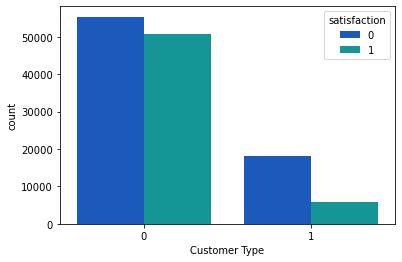

In [20]:
sns.countplot(data=df, x='Customer Type', hue='satisfaction', palette='winter')

In [78]:
df['Customer Type'].value_counts()/ df.shape[0]*100

0    81.690791
1    18.309209
Name: Customer Type, dtype: float64

We can notice that we have much more Loyal Customer about 81 % and about 18 % Disloyal Customer

Type of Travel: 'Personal Travel': 0, 'Business travel': 1

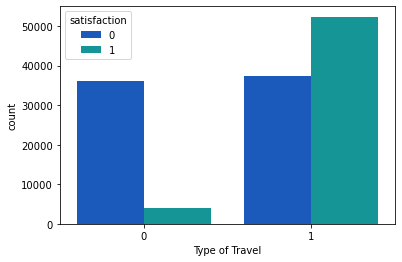

In [21]:
sns.countplot(data=df, x='Type of Travel', hue='satisfaction', palette='winter')

Type of Travel: 'Personal Travel': 0, 'Business travel': 1

In [89]:
df['Type of Travel'].value_counts()/ df.shape[0]*100

1    69.058362
0    30.941638
Name: Type of Travel, dtype: float64

As we can see 69% is Business travellers and they are much more satisfied with the flight than the personal travellers.

Business Class: 'Eco Plus': 0, 'Business': 1, 'Eco': 2

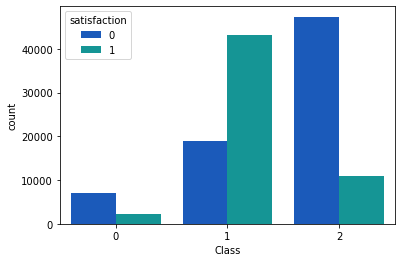

In [23]:
sns.countplot(data=df, x='Class', hue='satisfaction', palette='winter')

In [90]:
df['Class'].value_counts()/ df.shape[0]*100

1    47.859563
2    44.894518
0     7.245919
Name: Class, dtype: float64

Business class travellers make up 47 % of the total and they are the most satisfied. But most of Eco Class travellers are very dissatisfied 

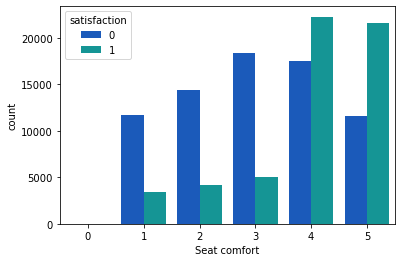

In [40]:
sns.countplot(data=df, x='Seat comfort', hue='satisfaction', palette='winter')

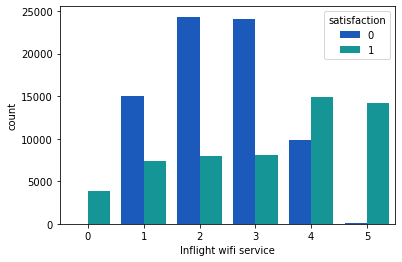

In [41]:
sns.countplot(data=df, x='Inflight wifi service', hue='satisfaction', palette='winter')

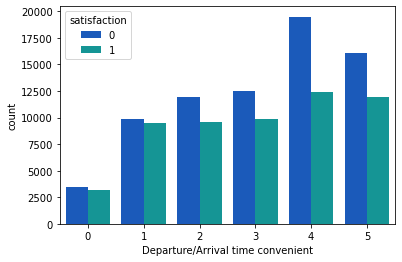

In [42]:
sns.countplot(data=df, x='Departure/Arrival time convenient', hue='satisfaction', palette='winter')

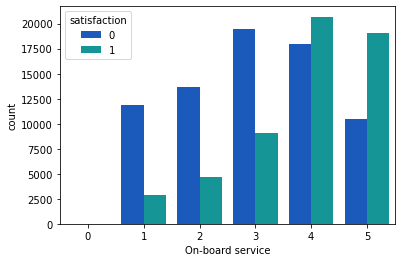

In [44]:
sns.countplot(data=df, x='On-board service', hue='satisfaction', palette='winter')

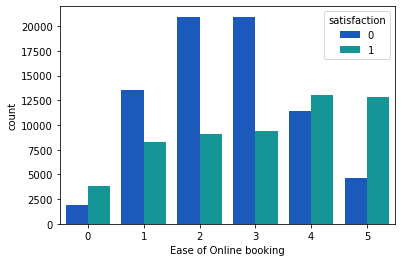

In [45]:
sns.countplot(data=df, x='Ease of Online booking', hue='satisfaction', palette='winter')

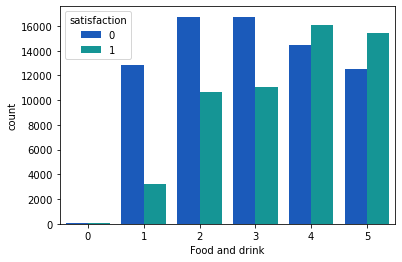

In [46]:
sns.countplot(data=df, x='Food and drink', hue='satisfaction', palette='winter')

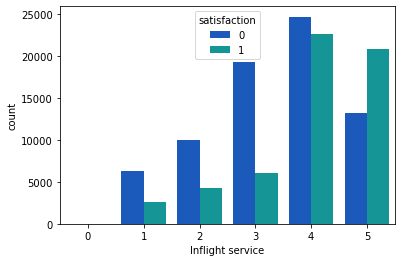

In [47]:
sns.countplot(data=df, x='Inflight service', hue='satisfaction', palette='winter')

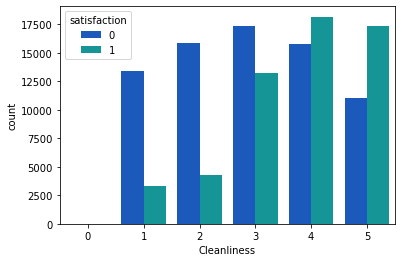

In [48]:
sns.countplot(data=df, x='Cleanliness', hue='satisfaction', palette='winter')

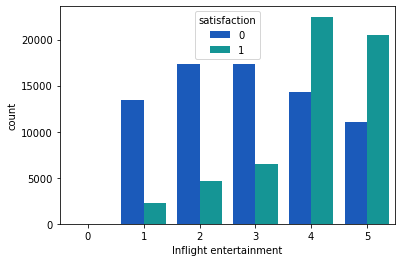

In [54]:
sns.countplot(data=df, x='Inflight entertainment', hue='satisfaction', palette='winter')

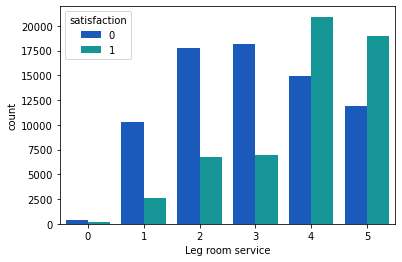

In [55]:
sns.countplot(data=df, x='Leg room service', hue='satisfaction', palette='winter')

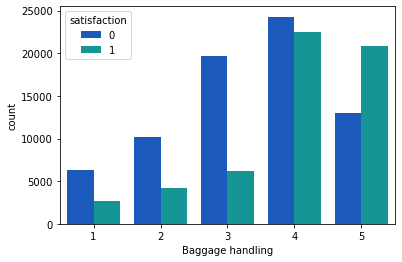

In [56]:
sns.countplot(data=df, x='Baggage handling', hue='satisfaction', palette='winter')

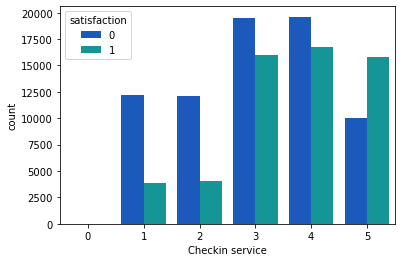

In [57]:
sns.countplot(data=df, x='Checkin service', hue='satisfaction', palette='winter')

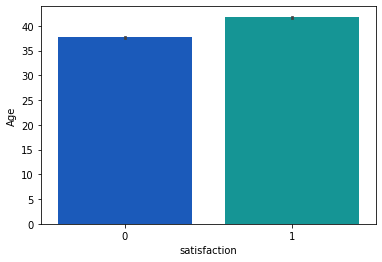

In [58]:
sns.barplot(data=df, x='satisfaction', y='Age', palette='winter')

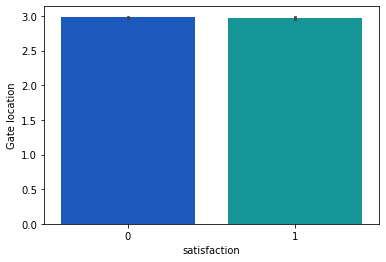

In [59]:
sns.barplot(data=df, x='satisfaction', y='Gate location', palette='winter')

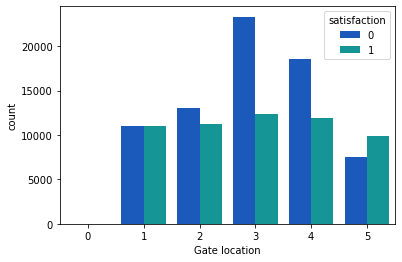

In [60]:
sns.countplot(data=df, x='Gate location', hue='satisfaction', palette='winter')

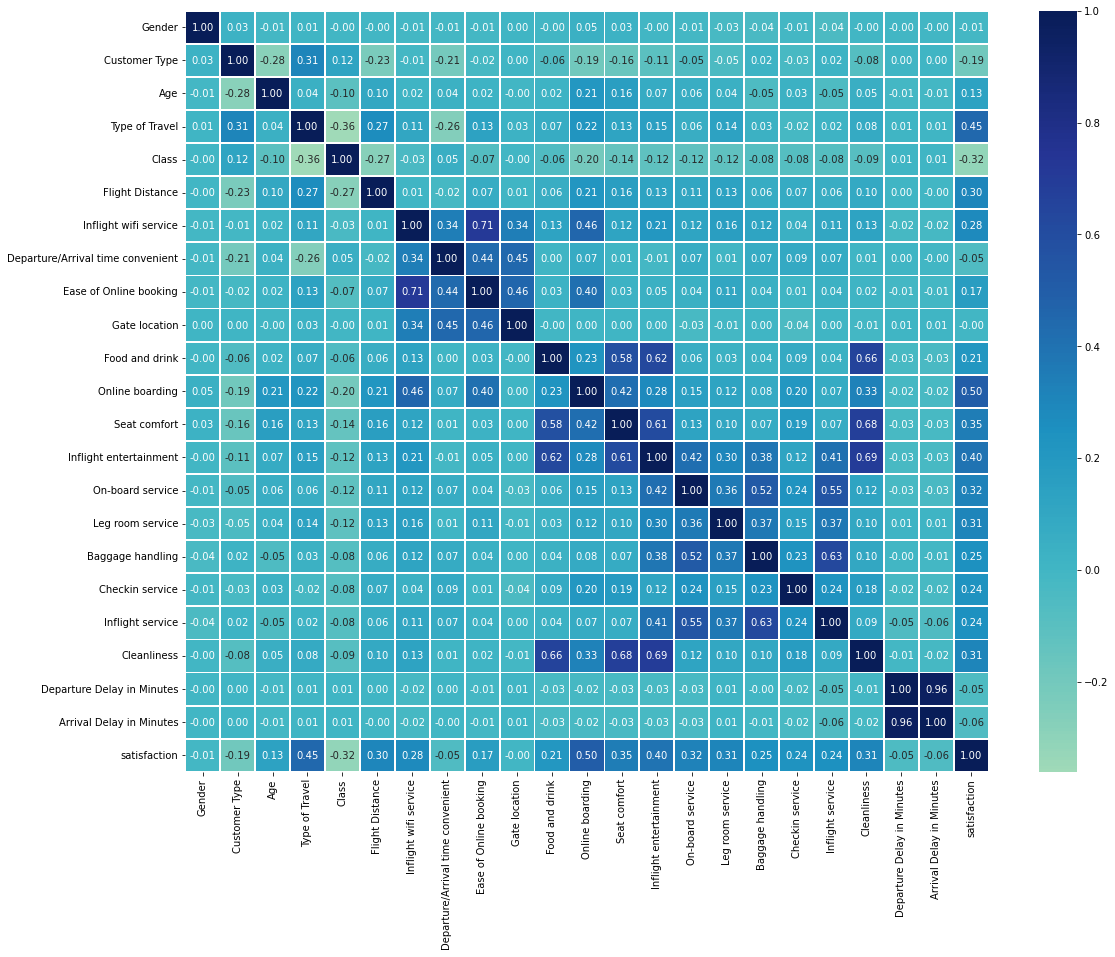

In [75]:
df_corr = df.columns

corr =  df[df_corr].corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr, center=0, annot=True, fmt='.2f', square=False, cmap="YlGnBu", linewidths= 0.8)

From the plots we see that Age and gate location do not affect customer satisfaction so we also drop them.

In [92]:
df.drop(columns=['Age', 'Gate location'], axis=1, inplace=True)

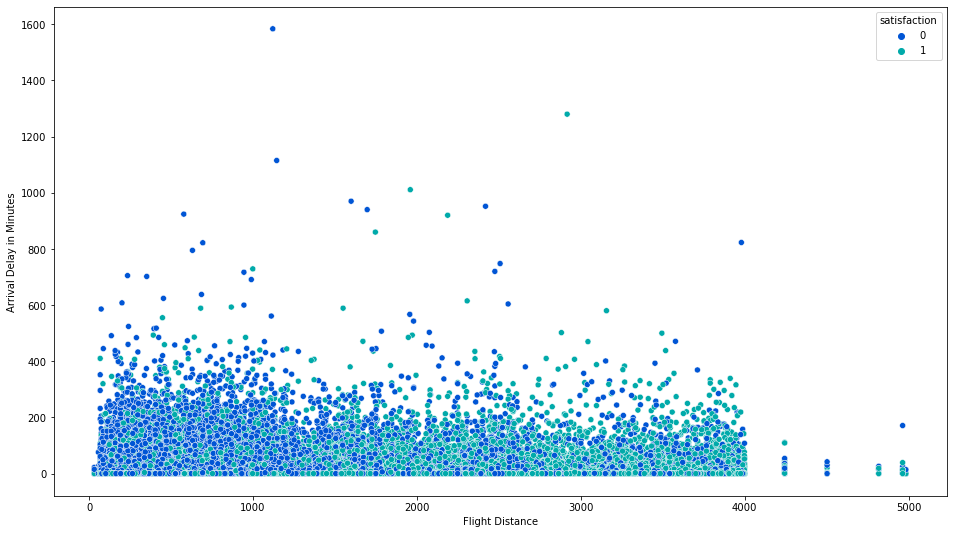

In [98]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df, x='Flight Distance', y='Arrival Delay in Minutes', hue='satisfaction', palette='winter')

the bigger Arrival Delay in Minuter and the shorter Flight Distance have big impact on satisfaction

In [99]:
X = df.drop(columns=['satisfaction'], axis=1)
y = df['satisfaction']

In [159]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report, precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
X_train.shape
X_test.shape

(25976, 20)

In [103]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### LOGISTIC REGRESSION

In [104]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

LogisticRegression()

In [106]:
y_pred_logistic_model = logistic_model.predict(X_test)

print(accuracy_score(y_test, y_pred_logistic_model))
print()
print(classification_report(y_test,y_pred_logistic_model))

0.8738450877733293

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     14622
           1       0.87      0.84      0.85     11354

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



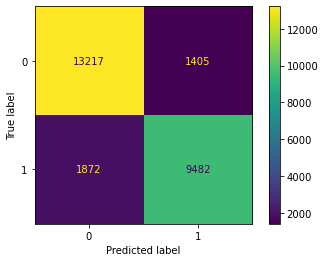

In [113]:
cm_log_reg = confusion_matrix(y_test, y_pred_logistic_model)
cm_log_reg_display = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg)
cm_log_reg_display.plot()

In [165]:
precision_log_reg, recall_log_reg, f1_score_log_reg, _ = precision_recall_fscore_support(y_test, y_pred_logistic_model, average='macro')

print('Accuracy:', accuracy_score(y_test, y_pred_logistic_model))
print("Precision:", precision_log_reg)
print("Recall:", recall_log_reg)
print("F1-Score:", f1_score_log_reg)

Accuracy: 0.8738450877733293
Precision: 0.8734415567050704
Recall: 0.8695180494320297
F1-Score: 0.8711818263491621


### K NEAREST NEIGHBORS

In [114]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [116]:
y_pred_knn_3 = knn_3.predict(X_test)

print("KNN Classification Accuracy:" , accuracy_score(y_test, y_pred_knn_3))
print()
print(classification_report(y_test, y_pred_knn_3))

KNN Classification Accuracy: 0.9241607637819526

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     14622
           1       0.94      0.88      0.91     11354

    accuracy                           0.92     25976
   macro avg       0.93      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



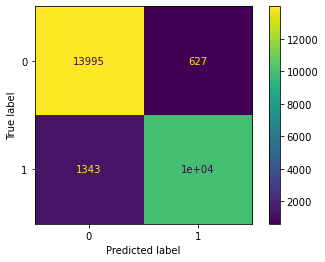

In [117]:
cm_knn_3 = confusion_matrix(y_test, y_pred_knn_3)
cm_knn_3_display = ConfusionMatrixDisplay(confusion_matrix=cm_knn_3)
cm_knn_3_display.plot()

### We can try to find better n_neighbors parameters using GridSearchCV

In [149]:
knn_k = KNeighborsClassifier()

grid_params = {
    'n_neighbors': np.arange(1, 7, 1),
}

grid_search_cv_knn = GridSearchCV(knn_k, grid_params, cv=3)

grid_search_cv_knn.fit(X_train, y_train)

print("Optimal n_neighbors: ", grid_search_cv_knn.best_params_['n_neighbors'])

Optimal n_neighbors:  5


### K NEAREST NEIGHBORS with optimal n_neighbors


In [150]:
knn_best_n = KNeighborsClassifier(n_neighbors=grid_search_cv_knn.best_params_['n_neighbors'])
knn_best_n.fit(X_train, y_train)

KNeighborsClassifier()

In [151]:
y_pred_knn_best = knn_best_n.predict(X_test)

print(classification_report(y_test, y_pred_knn_best))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     14622
           1       0.95      0.88      0.91     11354

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.93     25976
weighted avg       0.93      0.93      0.93     25976



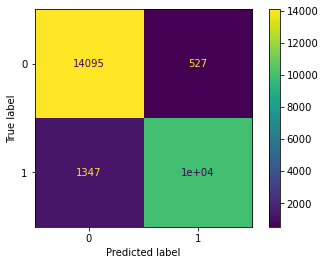

In [153]:
cm_knn_best = confusion_matrix(y_test, y_pred_knn_best)
cm_knn_best_display = ConfusionMatrixDisplay(confusion_matrix=cm_knn_best)
cm_knn_best_display.plot()

In [166]:
precision_knn, recall_knn, f1_score_knn, _ = precision_recall_fscore_support(y_test, y_pred_knn_best, average='macro')

print('Accuracy:', accuracy_score(y_test, y_pred_knn_best))
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-Score:", f1_score_knn)

Accuracy: 0.927856482907299
Precision: 0.931370943661328
Recall: 0.9226609074904492
F1-Score: 0.9260243109047676


### Decision Tree Classifier 

In [124]:
dec_tree = DecisionTreeClassifier()

dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [125]:
y_pred_dec_tree = dec_tree.predict(X_test)

print(classification_report(y_test, y_pred_dec_tree))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14622
           1       0.93      0.94      0.93     11354

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



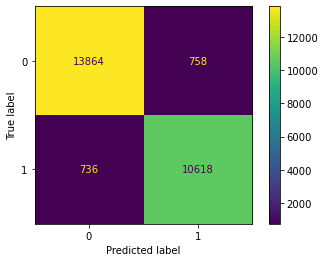

In [154]:
cm_dec_tree = confusion_matrix(y_test, y_pred_dec_tree)
cm_dec_tree_display = ConfusionMatrixDisplay(confusion_matrix=cm_dec_tree)
cm_dec_tree_display.plot()

In [167]:
precision_dec_tree, recall_dec_tree, f1_score_dec_tree, _ = precision_recall_fscore_support(y_test, y_pred_dec_tree, average='macro')

print('Accuracy:', accuracy_score(y_test, y_pred_dec_tree))
print("Precision:", precision_dec_tree)
print("Recall:", recall_dec_tree)
print("F1-Score:", f1_score_dec_tree)

Accuracy: 0.9424853711117955
Precision: 0.9414787680866231
Recall: 0.9416686682545891
F1-Score: 0.9415730116492516


### Naive Bayes Classification

In [126]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [127]:
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

print(classification_report(y_test, y_pred_naive_bayes))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     14622
           1       0.87      0.82      0.84     11354

    accuracy                           0.87     25976
   macro avg       0.87      0.86      0.86     25976
weighted avg       0.87      0.87      0.87     25976



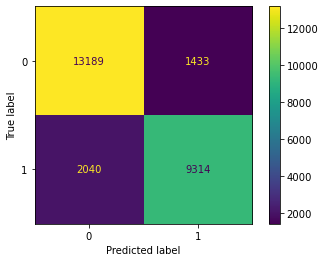

In [155]:
cm_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)
cm_naive_bayes_display = ConfusionMatrixDisplay(confusion_matrix=cm_naive_bayes)
cm_naive_bayes_display.plot()

In [168]:
precision_naive_bayes, recall_naive_bayes, f1_score_naive_bayes, _ = precision_recall_fscore_support(y_test, y_pred_naive_bayes, average='macro')

print('Accuracy:', accuracy_score(y_test, y_pred_naive_bayes))
print("Precision:", precision_naive_bayes)
print("Recall:", recall_naive_bayes)
print("F1-Score:", f1_score_naive_bayes)

Accuracy: 0.8662996612257469
Precision: 0.8663527545108725
Recall: 0.8611623143363063
F1-Score: 0.863256639084325


### Neural Networks

In [142]:
X_train.shape

(103904, 20)

In [143]:
model = Sequential([
    keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    keras.layers.Dense(14, activation=tf.nn.relu),
	keras.layers.Dense(14, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=14, batch_size=64)

Epoch 1/14
1624/1624 [==============================] - 2s 1ms/step - loss: 0.2572 - accuracy: 0.8964
Epoch 2/14
1624/1624 [==============================] - 2s 1ms/step - loss: 0.1703 - accuracy: 0.9312
Epoch 3/14
1624/1624 [==============================] - 2s 1ms/step - loss: 0.1524 - accuracy: 0.9383
Epoch 4/14
1624/1624 [==============================] - 2s 1ms/step - loss: 0.1409 - accuracy: 0.9440
Epoch 5/14
1624/1624 [==============================] - 2s 1ms/step - loss: 0.1324 - accuracy: 0.9465
Epoch 6/14
1624/1624 [==============================] - 2s 1ms/step - loss: 0.1254 - accuracy: 0.9494
Epoch 7/14
1624/1624 [==============================] - 2s 1ms/step - loss: 0.1210 - accuracy: 0.9507
Epoch 8/14
1624/1624 [==============================] - 2s 1ms/step - loss: 0.1178 - accuracy: 0.9514
Epoch 9/14
1624/1624 [==============================] - 2s 1ms/step - loss: 0.1159 - accuracy: 0.9520
Epoch 10/14
1624/1624 [==============================] - 2s 1ms/step - loss: 0.114

In [144]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 14)                294       
                                                                 
 dense_8 (Dense)             (None, 14)                210       
                                                                 
 dense_9 (Dense)             (None, 1)                 15        
                                                                 
Total params: 519
Trainable params: 519
Non-trainable params: 0
_________________________________________________________________


In [148]:
y_pred_nn = model.predict(X_test)
y_pred = [round(prob[0]) for prob in y_pred_nn]

812/812 [==============================] - 1s 710us/step


In [146]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     14622
           1       0.97      0.93      0.95     11354

    accuracy                           0.95     25976
   macro avg       0.96      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



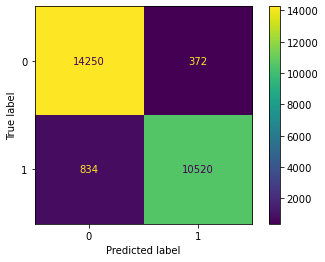

In [156]:
cm_nn = confusion_matrix(y_test, y_pred)
cm_nn_display = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
cm_nn_display.plot()

In [169]:
precision_nn, recall_nn, f1_score_nn, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')


print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision:", precision_nn)
print("Recall:", recall_nn)
print("F1-Score:", f1_score_nn)

Accuracy: 0.9535725284878349
Precision: 0.9552780594663275
Recall: 0.9505522973181709
F1-Score: 0.9525950739071545
